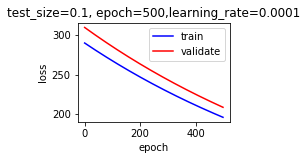

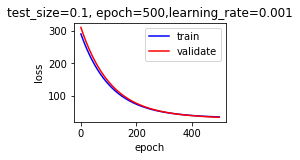

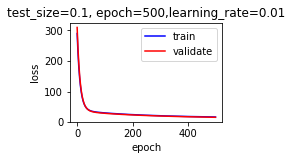

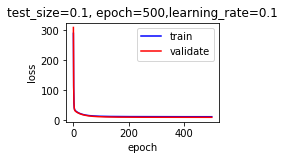

In [15]:
#导入所需函数库
from io import BytesIO
import requests
import numpy as np
from numpy import random,mat
import numpy.linalg as lg
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
#构建模型类
class gradient(object):
    def __init__(self):
        self.W = None
        self.b = None
    
    def loss(self,X,y,X_test,y_test):
        num_feature  = X.shape[1]
        num_train = X.shape[0]
        num_test=X_test.shape[0]
        h_train = self.predict(X)
        h_test = self.predict(X_test)
        loss_train = 0.5 *np.sum(np.square(h_train - y)) / num_train
        loss_test = 0.5*np.sum(np.square(h_test-y_test)) / num_test 
        dW = X.T.dot((h_train-y)) / num_train
        db = np.sum((h_train-y)) / num_train
        
        return loss_train,loss_test,dW,db
        
    def train(self,X,y,X_test,y_test,learn_rate = 0.001,iters = 500):
        num_feature = X.shape[1]
        self.W = np.zeros((num_feature,1))
        self.b = 0
        loss_list_train = []
        loss_list_test = []
        for i in xrange(iters):
            loss_train,loss_test,G,db = self.loss(X,y,X_test,y_test)
            D=-G
            loss_list_train.append(loss_train)
            loss_list_test.append(loss_test)
            self.W += learn_rate*D
            self.b += -learn_rate*db
        return loss_list_train,loss_list_test
        
    def predict(self,X):
        y_pred = X.dot(self.W) + self.b
        return y_pred
    pass
#读取数据
r = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale")
X, y=datasets.load_svmlight_file(BytesIO(r.content),n_features=14)
X=X.toarray()
iters=[100,500,1000,5000]
learn_rate=[0.0001,0.001,0.01,0.1]
loss_train_array=[]
loss_test_array=[]
loss_array=[]
# for i in iters:
#     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
#     y_train=y_train.reshape(X_train.shape[0],1)
#     y_test=y_test.reshape(X_test.shape[0],1)
#     linear = gradient()
#     loss_list_train,loss_list_test = linear.train(X_train,y_train,X_test,y_test,iters=i)
#     loss_train_array.append(loss_list_train)
#     loss_test_array.append(loss_list_test)

for learn in learn_rate:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
    y_train=y_train.reshape(X_train.shape[0],1)
    y_test=y_test.reshape(X_test.shape[0],1)
    linear = gradient()
    loss_list_train,loss_list_test = linear.train(X_train,y_train,X_test,y_test,learn_rate=learn)
    loss_train_array.append(loss_list_train)
    loss_test_array.append(loss_list_test)
#画图
count=0
# for it in iters:
#     ite = np.arange(0, it)
#     plt.subplot(221)
#     plt.plot(ite, loss_train_array[count],color='b',label="train")
#     plt.plot(ite, loss_test_array[count],color='r',label="validate")
#     plt.title("test_size=0.1, epoch="+str(it)+",learning_rate=0.1")
#     plt.xlabel('epoch')
#     plt.ylabel('loss')
#     plt.legend(loc='upper right')
#     plt.show()
#     count+=1
    
for lear in learn_rate:
    ite=np.arange(0,500)
    plt.subplot(221)
    plt.plot(ite, loss_train_array[count],color='b',label="train")
    plt.plot(ite, loss_test_array[count],color='r',label="validate")
    plt.title("test_size=0.1, epoch=500,learning_rate="+str(lear))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()
    count+=1